In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
fdir = '/data2/GBT/S140/'

In [4]:
def S295(freqs):
    a0 = 1.4866 
    a1 = -0.7871
    a2 = -0.3440
    a3 = 0.0749
    f = freqs * 1.e-9
    logf = np.log10(f)
    logS = a0 + a1*logf + a2*logf**2 + a3*logf**3
    return 10.**(logS)

In [5]:
def get_freqs_pdiode(k=0, show=True):
    x = np.load(fnames[k])
    y = np.load(fnames[k+1])
    print fnames[k]
    print fnames[k+1]
    if np.any(x['valid'] ^ y['valid']):
        print "CHECK MASK"
    mask = x['valid']
    freqs = x['freqs']

    if x['source'] == 'ON' and y['source'] == 'OFF':
        onSonD = x['yyon']
        onSoffD = x['yyoff']
        offSonD = y['yyon']
        offSoffD = y['yyoff']
    elif x['source'] == 'OFF' and y['source'] == 'ON':
        onSonD = y['yyon']
        onSoffD = y['yyoff']
        offSonD = x['yyon']
        offSoffD = x['yyoff']
    else:
        print "DISASTER"
    
    Psource = S295(freqs)
    gain = np.nanmean(onSoffD[200:,:] - offSoffD[200:,:], 0) / Psource
    Pdiode = np.nanmean(offSonD[200:,:] - offSoffD[200:,:], 0) / gain
    if show:
        figure()
        plot(freqs, np.nanmean(onSonD[200:,mask], 0), label='onSonD')
        plot(freqs, np.nanmean(onSoffD[200:,mask], 0), label='onSoffD')
        plot(freqs, np.nanmean(offSonD[200:,mask], 0), label='offSonD')
        plot(freqs, np.nanmean(offSoffD[200:,mask], 0), label='offSoffD')
        legend()
        figure()
        plot(freqs, Pdiode)
        xlabel('frequency')
        ylabel('Jy')
    return freqs, Pdiode

In [13]:
let = 'B'

In [14]:
fnamesA = glob.glob(fdir+'Daisy/*/*_03_*'+let+'*rfireduced.npz')
fnamesA.sort()
print len(fnamesA)

24


In [15]:
fnames = glob.glob('/data2/GBT/*295/OnOff/*/*_03_*'+let+'*rfireduced.npz')
fnames.sort()
print len(fnames)

2


In [16]:
fdiode, pdiode = get_freqs_pdiode(0, False)

/data2/GBT/3C295/OnOff/scan_03_006.raw.vegas/scan_03_006.raw.vegas.B.fits.rfireduced.npz
/data2/GBT/3C295/OnOff/scan_03_007.raw.vegas/scan_03_007.raw.vegas.B.fits.rfireduced.npz


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: Mean of empty slice
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: Mean of empty slice


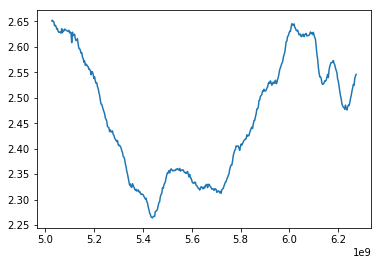

In [17]:
plot(fdiode, pdiode)

In [10]:
np.save('../calibrations/lownoise_calibration_3C295_03_Ayy.npy', [fdiode, pdiode])